In [1]:
import pandas as pd
import geopandas as gp

In [3]:
housing_data = gp.read_file('../data/Maps/Housing_data.shp')

In [4]:
housing_data.shape

(60, 14)

<AxesSubplot:>

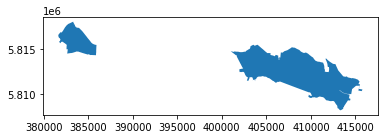

In [24]:
gp.GeoDataFrame([housing_data.iloc[19], housing_data.iloc[45]]).plot()

<AxesSubplot:>

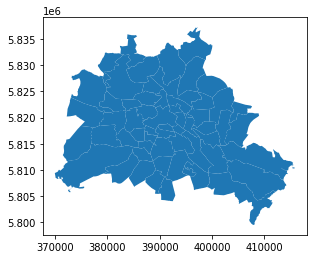

In [5]:
housing_data.plot()